In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/user/Data for ML.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2681 non-null   object 
 1   First Name     2683 non-null   object 
 2   Age            2677 non-null   float64
 3   Country        2683 non-null   object 
 4   City           2677 non-null   object 
 5   Timezone       2668 non-null   object 
 6   EduQuest Date  2683 non-null   object 
 7   Explorer ID    2683 non-null   object 
 8   Cohort         2683 non-null   object 
dtypes: float64(1), object(8)
memory usage: 188.8+ KB


In [2]:
df.describe()


,Age
count,2677.000000
mean,26.223011
std,77.480071
min,-2.000000
25%,18.000000
50%,21.000000
75%,27.000000
max,2021.000000


In [3]:
df.isnull().sum()

ID                2
First Name        0
Age               6
Country           0
City              6
Timezone         15
EduQuest Date     0
Explorer ID       0
Cohort            0
dtype: int64

In [4]:
#replacing empty values with null
df.fillna('null', inplace = True)
print(df)


                            ID  First Name   Age               Country  \
0                         5272      Albina  16.0               Ukraine   
1                        40345       Ceren  16.0                Turkey   
2                        40438       Dipin  20.0                 Nepal   
3                        40657     Violeta  25.0         United states   
4                        40291       Cansu  17.0                Turkey   
...                        ...         ...   ...                   ...   
2678  6681aa2864338e92bf7b9a45      Mursal  15.0           Afghanistan   
2679  66797ec06afce5f1736ff089  Ohiorenoya  46.0  United Arab Emirates   
2680  6680191ab2e0f80a5c739338     Sasanka  30.0                 India   
2681  667f88e061f4af49f18da1d0    Shreejan  18.0                 Nepal   
2682  667f2ccc9600b609edf21b02       Tuğba  17.0                Turkey   

             City         Timezone EduQuest Date    Explorer ID        Cohort  
0            Kyiv        GMT+03

In [5]:
#checking for duplicate rows
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
2678    False
2679    False
2680    False
2681    False
2682    False
Length: 2683, dtype: bool


In [6]:
#removing duplicate rows
df_no_duplicates_last = df.drop_duplicates(keep = 'last')
print (df_no_duplicates_last)

                            ID  First Name   Age               Country  \
0                         5272      Albina  16.0               Ukraine   
1                        40345       Ceren  16.0                Turkey   
2                        40438       Dipin  20.0                 Nepal   
3                        40657     Violeta  25.0         United states   
4                        40291       Cansu  17.0                Turkey   
...                        ...         ...   ...                   ...   
2678  6681aa2864338e92bf7b9a45      Mursal  15.0           Afghanistan   
2679  66797ec06afce5f1736ff089  Ohiorenoya  46.0  United Arab Emirates   
2680  6680191ab2e0f80a5c739338     Sasanka  30.0                 India   
2681  667f88e061f4af49f18da1d0    Shreejan  18.0                 Nepal   
2682  667f2ccc9600b609edf21b02       Tuğba  17.0                Turkey   

             City         Timezone EduQuest Date    Explorer ID        Cohort  
0            Kyiv        GMT+03

In [7]:
# Check for NaN values in the 'Age' column
print(df['Age'].isna().sum())


0


In [8]:
# Fill NaN values with the median age
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].fillna(df['Age'].median(), inplace=True)


In [9]:
#calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
#define the bounds of the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [11]:
#calculate the median of the ages
median_age = df['Age'].median()

#replace the outliers with the median value
df['Age'] = df['Age'].apply(lambda x: median_age if x < lower_bound or x >upper_bound else x)

#display the dataframe with replaced values
df

,ID,First Name,Age,Country,City,Timezone,EduQuest Date,Explorer ID,Cohort
0,5272,Albina,16.0,Ukraine,Kyiv,GMT+03:00,"Aug 11, 2023",explorerxx19b,AUG 11 WD 23
1,40345,Ceren,16.0,Turkey,Istanbul,GMT+03:00,"Aug 11, 2023",explorerR160r,AUG 11 WD 23
2,40438,Dipin,20.0,Nepal,Katmandu,GMT+05:45,"Aug 11, 2023",explorerwGnIi,AUG 11 WD 23
3,40657,Violeta,25.0,United states,New_york,GMT-04:00,"Aug 11, 2023",explorer6U2l8,AUG 11 WD 23
4,40291,Cansu,17.0,Turkey,Istanbul,GMT+03:00,"Aug 11, 2023",exploreryVa0H,AUG 11 WD 23
...,...,...,...,...,...,...,...,...,...
2678,6681aa2864338e92bf7b9a45,Mursal,15.0,Afghanistan,Kabul,Asia/Kabul,"Jul 22, 2024",explorerVG35I,JUL 22 WE 24
2679,66797ec06afce5f1736ff089,Ohiorenoya,21.0,United Arab Emirates,Dubai,Asia/Dubai,"Jul 22, 2024",explorerXYw1J,JUL 22 WE 24
2680,6680191ab2e0f80a5c739338,Sasanka,30.0,India,Navi Mumbai,Asia/Kolkata,"Jul 22, 2024",explorerzXJmK,JUL 22 WE 24
2681,667f88e061f4af49f18da1d0,Shreejan,18.0,Nepal,Kathmandu,Asia/Kathmandu,"Jul 22, 2024",explorerRnFUb,JUL 22 WE 24


In [12]:
print(df['Age'].isna().sum())

df.describe()


0


,Age
count,2683.000000
mean,22.824823
std,6.031908
min,12.000000
25%,18.000000
50%,21.000000
75%,26.000000
max,40.000000


In [13]:
#Define the bins for the age groups, ensuring they fall within the >13 and <60 range
bins = [12, 20, 30, 41]

# Create labels corresponding to the bin ranges
labels = ['12-20', '20-30', '30-41']

# Create the 'Age Group' column using pd.cut()
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'Age Group' column
df.head(10)


,ID,First Name,Age,Country,City,Timezone,EduQuest Date,Explorer ID,Cohort,Age Group
0,5272,Albina,16.0,Ukraine,Kyiv,GMT+03:00,"Aug 11, 2023",explorerxx19b,AUG 11 WD 23,12-20
1,40345,Ceren,16.0,Turkey,Istanbul,GMT+03:00,"Aug 11, 2023",explorerR160r,AUG 11 WD 23,12-20
2,40438,Dipin,20.0,Nepal,Katmandu,GMT+05:45,"Aug 11, 2023",explorerwGnIi,AUG 11 WD 23,20-30
3,40657,Violeta,25.0,United states,New_york,GMT-04:00,"Aug 11, 2023",explorer6U2l8,AUG 11 WD 23,20-30
4,40291,Cansu,17.0,Turkey,Istanbul,GMT+03:00,"Aug 11, 2023",exploreryVa0H,AUG 11 WD 23,12-20
5,40828,Mariia,22.0,Ukraine,Athens,GMT+03:00,"Aug 11, 2023",explorerbY2HW,AUG 11 WD 23,20-30
6,40284,Sezin,23.0,Turkey,Istanbul,GMT+03:00,"Aug 11, 2023",explorerYWIUa,AUG 11 WD 23,20-30
7,40176,Aybüke,22.0,Turkey,Istanbul,GMT+03:00,"Aug 11, 2023",explorerjrC79,AUG 11 WD 23,20-30
8,40300,Bijaya,24.0,Nepal,Katmandu,GMT+05:45,"Aug 11, 2023",explorerlN0mg,AUG 11 WD 23,20-30
9,40888,Derya,27.0,Turkey,Istanbul,GMT+03:00,"Aug 11, 2023",explorerWa9tc,AUG 11 WD 23,20-30


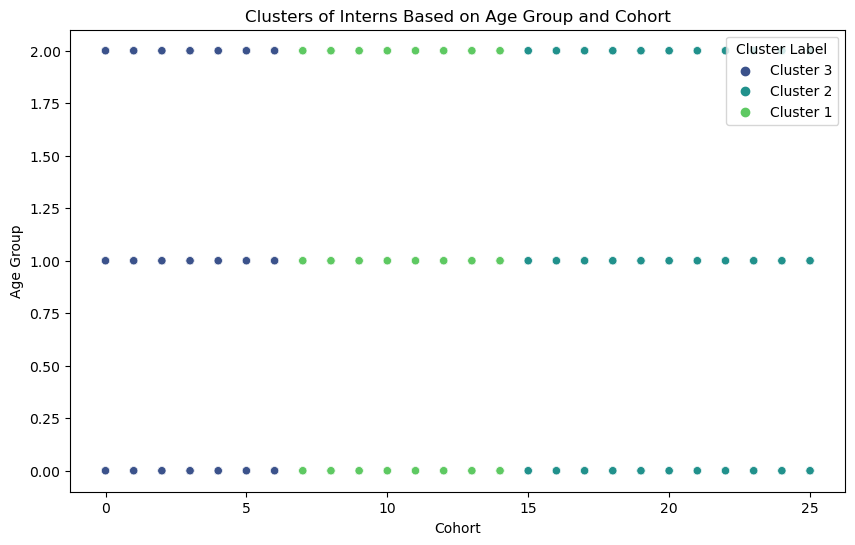

,ID,First Name,Age,Country,City,Timezone,EduQuest Date,Explorer ID,Cohort,Age Group,Cohort Encoded,Age Group Encoded,Cluster,Cluster Label
0,5272,Albina,16.0,Ukraine,Kyiv,GMT+03:00,"Aug 11, 2023",explorerxx19b,AUG 11 WD 23,12-20,2,0,2,Cluster 3
1,40345,Ceren,16.0,Turkey,Istanbul,GMT+03:00,"Aug 11, 2023",explorerR160r,AUG 11 WD 23,12-20,2,0,2,Cluster 3
2,40438,Dipin,20.0,Nepal,Katmandu,GMT+05:45,"Aug 11, 2023",explorerwGnIi,AUG 11 WD 23,20-30,2,1,2,Cluster 3
3,40657,Violeta,25.0,United states,New_york,GMT-04:00,"Aug 11, 2023",explorer6U2l8,AUG 11 WD 23,20-30,2,1,2,Cluster 3
4,40291,Cansu,17.0,Turkey,Istanbul,GMT+03:00,"Aug 11, 2023",exploreryVa0H,AUG 11 WD 23,12-20,2,0,2,Cluster 3


In [14]:
# Encode the 'Age Group' and 'Cohort'

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


encoder = LabelEncoder()
df['Cohort Encoded'] = encoder.fit_transform(df['Cohort'])
df['Age Group Encoded'] = encoder.fit_transform(df['Age Group'])

# Prepare the data for clustering
features = ['Age Group Encoded', 'Cohort Encoded']

# Fit the K-Means model
kmeans = KMeans(n_clusters=3,n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

# Assign clusters back to the original DataFrame
df['Cluster Label'] = df['Cluster'].apply(lambda x: f'Cluster {x+1}')

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cohort Encoded', y='Age Group Encoded', hue='Cluster Label', data=df, palette='viridis')
plt.xlabel('Cohort')
plt.ylabel('Age Group')
plt.title('Clusters of Interns Based on Age Group and Cohort')
plt.show()

# Display the resulting DataFrame
df[['Age', 'Age Group','Cohort','Cluster']].tail()

df.head()

In [15]:
df.describe()

,Age,Cohort Encoded,Age Group Encoded,Cluster
count,2683.000000,2683.000000,2683.000000,2683.000000
mean,22.824823,12.043235,0.821469,0.909057
std,6.031908,7.342301,0.689076,0.775225
min,12.000000,0.000000,0.000000,0.000000
25%,18.000000,6.000000,0.000000,0.000000
50%,21.000000,11.000000,1.000000,1.000000
75%,26.000000,19.000000,1.000000,2.000000
max,40.000000,25.000000,2.000000,2.000000


In [16]:
!python -m pip install xlsxwriter

file_path = 'C:/Users/user/Documents/clustered_data_by_cohort.xlsx'

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    
    # Get the list of unique cohorts
    cohorts = df['Cohort'].unique()
    
    # Loop through each cohort and write its data to a separate sheet
    for cohort in cohorts:
        # Filter the DataFrame for the current cohort
        cohort_data = df[df['Cohort'] == cohort]
        
        # Write the data to a sheet named after the cohort
        cohort_data.to_excel(writer, sheet_name=cohort, index=False)

# The writer.save() call is handled automatically by the 'with' statement